# Assignment 2
### Understanding Uncertainty
### Due 9/12

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

The most profitable item is defined as the item that brings the most profit. This means the product of bottles sold by the difference of the bottle retail and bottle cost. This difference expresses the profit per bottle, how much the store paid for the bottle and how much the store sells the bottle for. Then, to find the total profit, we must multiply that difference by the number of bottles sold in the state.

In [71]:
iowa = pd.read_csv('data/iowa.csv')
iowa["profits"] = iowa["Bottles Sold"] * (iowa["State Bottle Retail"] - iowa["State Bottle Cost"])
category_profits = iowa.groupby("Item Description")["profits"].sum()
category_profits_sorted = category_profits.sort_values(ascending=False).head(10)
category_profits_sorted

Item Description
TITOS HANDMADE VODKA               364074.35
BLACK VELVET                       274676.85
FIREBALL CINNAMON WHISKEY          187535.22
CROWN ROYAL                        160981.95
CROWN ROYAL REGAL APPLE            122880.40
CAPTAIN MORGAN SPICED RUM          121115.30
HAWKEYE VODKA                      116375.04
CAPTAIN MORGAN ORIGINAL SPICED     112146.71
JACK DANIELS OLD #7 BLACK LABEL    111509.09
HENNESSY VS                        108459.45
Name: profits, dtype: float64

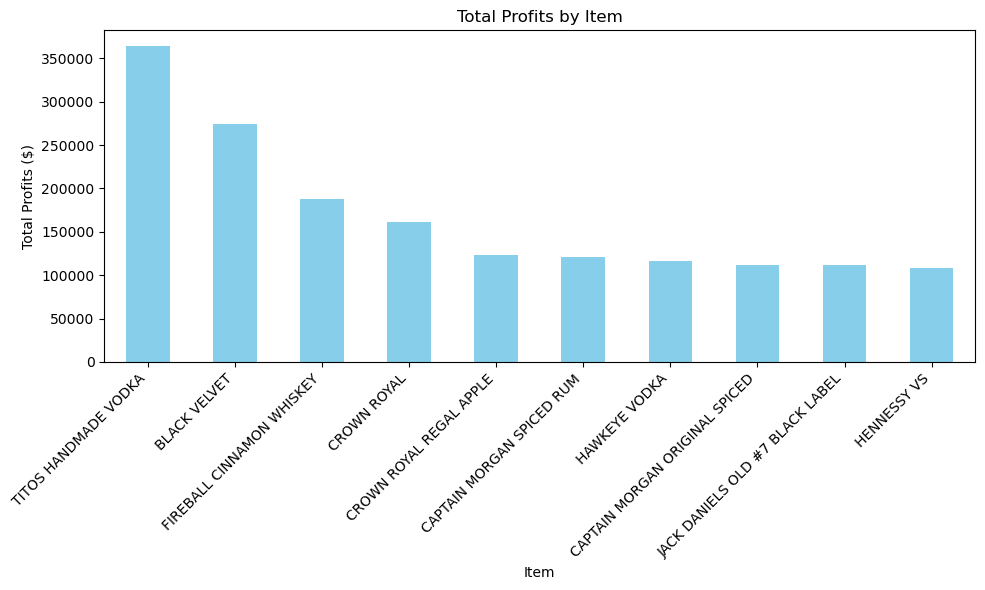

In [72]:
plt.figure(figsize=(10,6))
category_profits_sorted.plot(kind='bar', color='skyblue')
plt.title("Total Profits by Item")
plt.ylabel("Total Profits ($)")
plt.xlabel("Item")
plt.xticks(rotation=45, ha='right')  # rotate x labels for readability
plt.tight_layout()  # adjusts plot to fit labels
plt.show()

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?

In [73]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [74]:
# x - y

We get an error indicating that the matrices are of different dimensions and therefore we cannot take the difference.

- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?

In [75]:
m1 = x.reshape(-1,1) - y.reshape(1,-1)
m1

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

This works just fine!

- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.

In [76]:
m2 = x.reshape(1,-1) - y.reshape(-1,1)
m2

array([[-1,  1,  3],
       [-4, -2,  0]])

This works, as well, and displays the transpose of the previous answer.

In [77]:
m1 - m2.T

array([[0, 0],
       [0, 0],
       [0, 0]])

- Write two double for-loops to replicate the results of the previous two answers. 

In [78]:
# Result of x.reshape(-1,1) - y.reshape(1,-1)
result1 = np.zeros((len(x), len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        result1[i, j] = x[i] - y[j]

# Result of x.reshape(1,-1) - y.reshape(-1,1)
result2 = np.zeros((len(y), len(x)))
for i in range(len(y)):
    for j in range(len(x)):
        result2[i, j] = x[j] - y[i]

print("Method 1: ", result1)
print("Method 2: ", result2)

Method 1:  [[-1. -4.]
 [ 1. -2.]
 [ 3.  0.]]
Method 2:  [[-1.  1.  3.]
 [-4. -2.  0.]]


- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

x.reshape(1,-1) converts the 1-dimensional array, [1, 3, 5], into a row vector with 1 row and 3 columns, while x.reshape(-1,1) converts the 1-dimensional array into a column vector with 3 rows and 1 column. These reshapes don’t change the data, only the array’s shape, and are useful for broadcasting operations, allowing element-wise arithmetic between arrays of compatible shapes.

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$

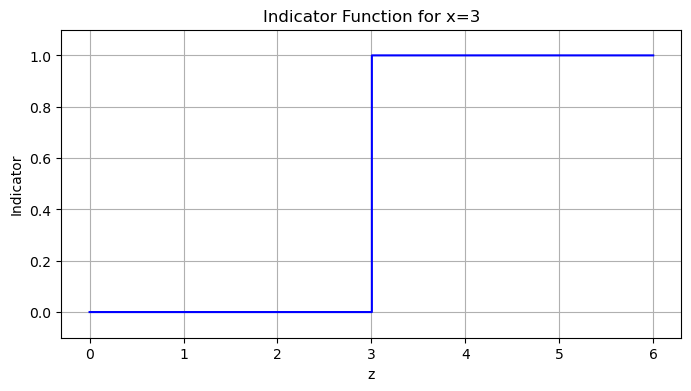

In [79]:
x = 3
z = np.linspace(0, 6, 600)  # range of z values
indicator = (x <= z).astype(int)  # 1 if x <= z, else 0

plt.figure(figsize=(8,4))
plt.step(z, indicator, where='post', color='blue')
plt.title(r'Indicator Function for x=3')
plt.xlabel('z')
plt.ylabel('Indicator')
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.show()

- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.

The “complement” of the condition $x\leq z$ is $x>z$. Subtracting the indicator from 1 flips 0 ↔ 1, which gives exactly the indicator for the opposite condition. The plot, below, shows how this looks in practice.

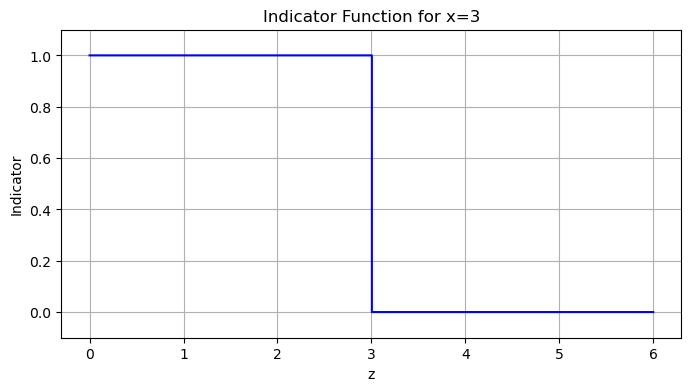

In [80]:
x = 3
z = np.linspace(0, 6, 600)  # range of z values
indicator = (x > z).astype(int)  # 1 if x > z, else 0

plt.figure(figsize=(8,4))
plt.step(z, indicator, where='post', color='blue')
plt.title(r'Indicator Function for x=3')
plt.xlabel('z')
plt.ylabel('Indicator')
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.show()

- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.

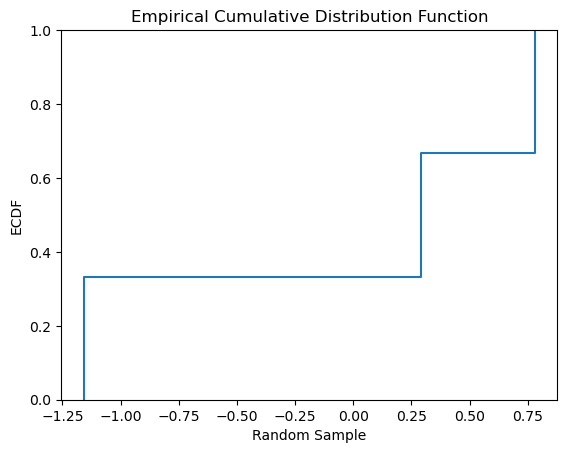

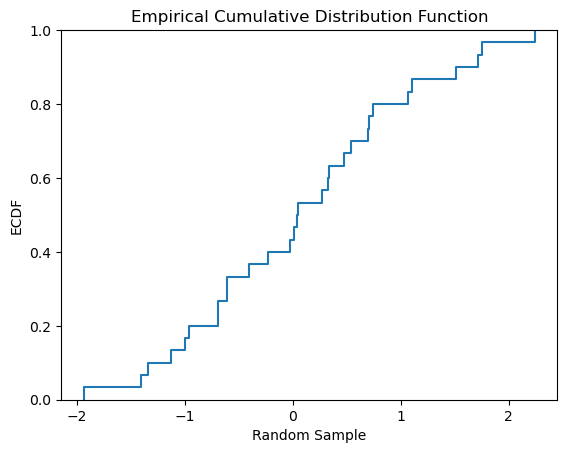

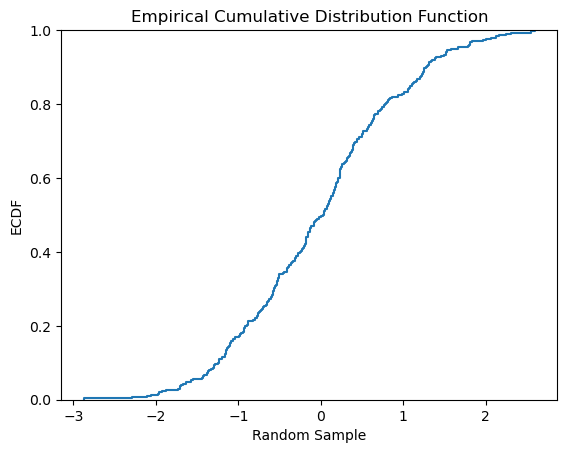

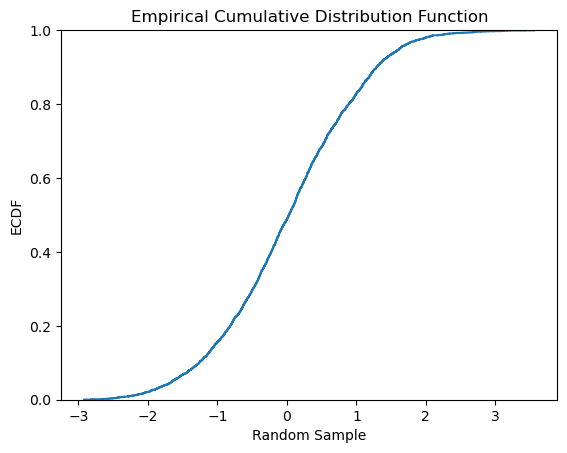

In [81]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:
    sns.ecdfplot(X)
    plt.xlabel("Random Sample")        
    plt.ylabel("ECDF")         
    plt.title("Empirical Cumulative Distribution Function")  
    plt.show()

- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

As the sample size, $N$, increases, the ECDF becomes much smoother. This is because more data points provide a finer resolution of the underlying distribution, reducing the size of the jumps at each observation and making the empirical distribution a closer approximation to the true cumulative distribution function (CDF).

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`

In [82]:
def compute_quantile(data, q):
    """
    Compute the q-quantile of a list or array of numbers.
    
    Parameters:
        data (list or array): numeric values
        q (float): quantile in [0, 1], e.g., 0.5 for median
    
    Returns:
        float: the q-quantile value
    """
    if not 0 <= q <= 1:
        raise ValueError("q must be between 0 and 1")

    # Sort the data
    sorted_data = sorted(data)
    n = len(sorted_data)

    # Position in the sorted array
    pos = q * (n - 1)
    lower = int(pos)
    upper = min(lower + 1, n - 1)
    weight = pos - lower

    # Linear interpolation
    return sorted_data[lower] * (1 - weight) + sorted_data[upper] * weight

- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR

In [83]:
def compute_iqr_and_whiskers(data):
    """
    Compute the IQR and whiskers for a dataset.
    
    IQR = Q3 - Q1
    Whiskers = [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    
    Parameters:
        data (list or array): numeric values
    
    Returns:
        dict with Q1, Q3, IQR, lower_whisker, upper_whisker
    """
    Q1 = compute_quantile(data, 0.25)
    Q3 = compute_quantile(data, 0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    
    return {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "lower_whisker": lower_whisker,
        "upper_whisker": upper_whisker
    }

- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers

In [84]:
def boxplot(data):
    """
    Compute a five-number summary and values for a boxplot.

    Parameters:
        data (list or array): numeric values
    
    Returns:
        dict with minimum, Q1, median, Q3, maximum, lower_whisker, upper_whisker
    """
    data_sorted = sorted(data)
    data_min = min(data_sorted)
    Q1 = compute_quantile(data, 0.25)
    Q3 = compute_quantile(data, 0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    median = compute_quantile(data, 0.5)
    upper_whisker = Q3 + 1.5 * IQR
    data_max = max(data_sorted)

    return {
        "min": data_min,
        "lower_whisker": lower_whisker,
        "Q1": Q1,
        "median": median,
        "Q3": Q3,
        "upper_whisker": upper_whisker,
        "max": data_max  
    }

- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.

In [85]:
def detect_outliers(data):
    """
    Identify outliers based on 1.5*IQR rule.
    
    Parameters:
        data (list or array): numeric values
    
    Returns:
        list of bool: True if the corresponding observation is an outlier
    """
    summary = boxplot(data)
    lower = summary["lower_whisker"]
    upper = summary["upper_whisker"]
    
    return [x < lower or x > upper for x in data]

- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [86]:
test_list = [-20, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 40]
boxplot(test_list)

{'min': -20,
 'lower_whisker': -10.5,
 'Q1': 5.25,
 'median': 10.5,
 'Q3': 15.75,
 'upper_whisker': 31.5,
 'max': 40}

In [87]:
test_outliers = detect_outliers(test_list)
print(test_outliers)

[True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True]


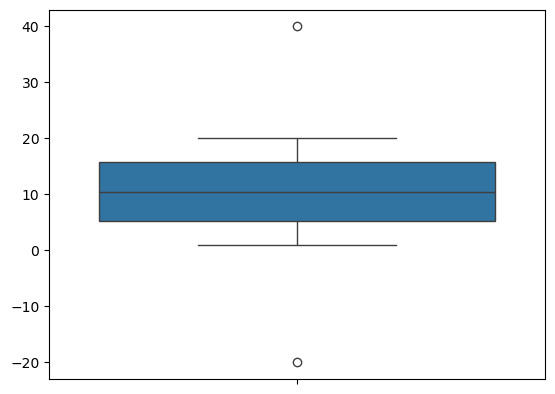

In [88]:
sns_test = sns.boxplot(test_list)

According to the Seaborne boxplot, the median is 10. This matches the median printed by my functions exactly. 

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides

In [106]:
def normal_kernel(x, h_s, plot = True, label = None):
    Z = np.sort(x.unique()).reshape(1,-1) # Extract unique values for x
    data = x.to_numpy().reshape(-1,1) # Reshape the data
    I = np.exp( -(data-Z)**2/(2*h_s**2) )/( np.sqrt(2*np.pi) * h_s) # Compute the kernel
    kde = np.mean(I,axis=0) # Sum over x indices and normalize
    #kde = kde/np.sum(kde) # Normalize the kde so it sums to 1
    grid = Z.reshape(-1,1)
    
    # Plot KDE
    if plot:
        title_str = x.name
        plt.plot(grid,kde)
        plt.title(f'Density Estimate: {title_str}')
        plt.ylabel('Proportion')
        plt.xlabel(title_str)

- Write a function that computes the plug-in bandwidth

In [90]:
def h(x):
    Z = np.sort(x.unique()).reshape(1,-1) # Extract unique values for x
    data = x.to_numpy().reshape(-1,1) # Reshape the data

    iqr = np.quantile(x,.75) - np.quantile(x,.25)
    h_s = 0.9 * min(np.std(x), iqr/1.34) * len(x) **(-0.2)
    return h_s

- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths

In [ ]:
df = pd.read_csv('data/mn_police_use_of_force.csv') 
x = df['age'].dropna()
h_s = h(x)
h_s

np.float64(1.3374311976398177)

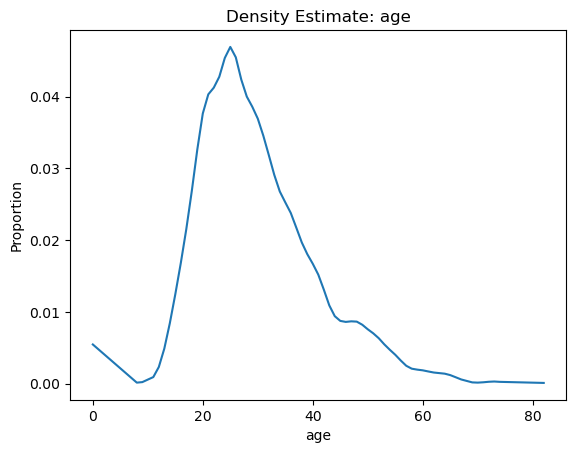

In [96]:
normal_kernel(x, h_s, plot = True)

- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?

C:\Users\linod\AppData\Local\Temp\ipykernel_21732\2272990574.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend() # Add legend


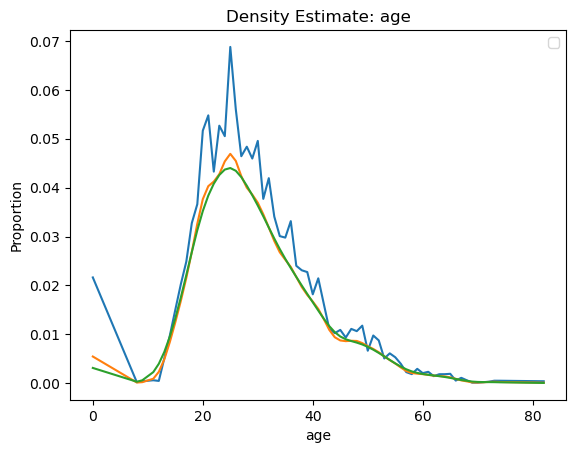

In [111]:
h_grid = [h_s - 1, h_s, h_s + 1]
for h in h_grid:
    normal_kernel(x, h, plot = True, label=f"h={h}")
plt.legend() # Add legend
plt.show() # Render plot

For whatever reason, the label function isn't working. However, the green line corresponds to $h+1$, the blue line corresponds to $h-1$, and the orange line corresponds to $h$ (the plug-in bandwidth). Given this:
- Blue line ($h-1$): This smaller bandwidth produces a KDE that is very wiggly and follows every small fluctuation in the data. This is overfitting, because it captures noise instead of the underlying distribution.
- Orange line ($h$): This provides a balanced smoothness. It captures the main shape of the distribution without reacting too strongly to small variations — this is generally considered the best fit.
- Green line ($h+1$): This larger bandwidth produces a very smooth KDE that misses some of the finer structure of the distribution. This is underfitting, because it oversmooths and loses detail about where the data are concentrated.